# Tabular ANN for Exploration of DEAP Dataset
Fingerprinting with DMD modes has worked really well. What about in tabular format?

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [36]:
from fastai.tabular import *
from sklearn import preprocessing

In [4]:
PATH = "/media/tris/tris_files/EEG_datasets/DMD/tabular"

In [6]:
df_raw = pd.read_csv('/media/tris/tris_files/EEG_datasets/DMD/tabular/dmd_deap_50modes_trials3.csv')
df_raw

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta16,zeta17,zeta18,zeta19,zeta20,zeta21,zeta22,zeta23,zeta24,zeta25
0,1,1,0.614814,-0.087397,-0.320053,1.410603,-0.789681,-0.030823,0.326317,-0.286574,...,0.493882,0.147711,0.056847,0.142136,0.105085,0.144424,0.175822,0.132348,0.157219,0.219461
1,1,2,-0.088526,0.975644,-0.866643,1.589470,0.014409,0.428341,1.857337,0.037218,...,0.977107,0.052504,0.141810,0.081457,0.163943,0.163877,0.149706,0.204827,0.162412,0.140685
2,1,3,0.482252,-1.007487,0.036876,0.447674,0.272007,2.752983,0.763709,-1.409766,...,0.881263,0.071147,0.049642,0.155528,0.132861,0.180283,0.135714,0.187156,0.113682,0.184400
3,1,4,0.823915,0.041140,0.927601,-0.803980,-0.500776,-1.271204,-0.772469,-0.603872,...,0.060358,0.108309,0.157512,0.061951,0.210791,0.137637,0.207966,0.096923,0.152389,0.149941
4,1,5,-0.774046,0.262418,-0.461349,2.512446,-0.139493,-0.129015,1.446123,0.252169,...,0.053968,0.123062,0.079270,0.145170,0.075568,0.219668,0.176209,0.195444,0.116692,0.173520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,32,36,-3.320858,0.570013,-0.319125,-0.852716,-3.327261,1.185592,0.295865,-0.362428,...,1.000000,0.995469,0.076210,0.104502,0.234229,0.145891,0.166352,0.198434,0.168770,0.179259
1276,32,37,-0.874191,-3.777669,-2.503243,-0.574673,1.832012,-1.139289,-2.304741,-0.698633,...,1.000000,0.096682,0.072892,0.255940,0.134141,0.120458,0.180773,0.155041,0.193442,0.164560
1277,32,38,0.632914,-0.966359,3.129836,1.385485,0.085605,0.799532,-2.165469,0.573599,...,0.879621,0.061895,0.921325,0.126629,0.101454,0.173624,0.146204,0.190822,0.207933,0.217672
1278,32,39,-2.764089,-3.496597,-1.853411,0.263244,1.120005,2.785592,-0.091470,-1.250502,...,1.000000,0.544934,0.077994,0.127893,0.123439,0.079106,0.191528,0.153139,0.164365,0.354397


In [7]:
df_raw.iloc[[40],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta16,zeta17,zeta18,zeta19,zeta20,zeta21,zeta22,zeta23,zeta24,zeta25
40,2,1,0.893205,0.294573,1.122256,-0.653728,-1.370544,0.135854,-0.107045,0.099121,...,1.0,0.877191,0.099661,0.131439,0.193674,0.043877,0.151126,0.129442,0.116061,0.232432


In [8]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/eeg-raw')

In [9]:
import pandas as pd
df_raw = pd.read_feather('tmp/eeg-raw') #lol raw sashimis and sushis
df_raw.head()

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta16,zeta17,zeta18,zeta19,zeta20,zeta21,zeta22,zeta23,zeta24,zeta25
0,1,1,0.614814,-0.087397,-0.320053,1.410603,-0.789681,-0.030823,0.326317,-0.286574,...,0.493882,0.147711,0.056847,0.142136,0.105085,0.144424,0.175822,0.132348,0.157219,0.219461
1,1,2,-0.088526,0.975644,-0.866643,1.589470,0.014409,0.428341,1.857337,0.037218,...,0.977107,0.052504,0.141810,0.081457,0.163943,0.163877,0.149706,0.204827,0.162412,0.140685
2,1,3,0.482252,-1.007487,0.036876,0.447674,0.272007,2.752983,0.763709,-1.409766,...,0.881263,0.071147,0.049642,0.155528,0.132861,0.180283,0.135714,0.187156,0.113682,0.184400
3,1,4,0.823915,0.041140,0.927601,-0.803980,-0.500776,-1.271204,-0.772469,-0.603872,...,0.060358,0.108309,0.157512,0.061951,0.210791,0.137637,0.207966,0.096923,0.152389,0.149941
4,1,5,-0.774046,0.262418,-0.461349,2.512446,-0.139493,-0.129015,1.446123,0.252169,...,0.053968,0.123062,0.079270,0.145170,0.075568,0.219668,0.176209,0.195444,0.116692,0.173520


In [10]:
df_raw.iloc[[500],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta16,zeta17,zeta18,zeta19,zeta20,zeta21,zeta22,zeta23,zeta24,zeta25
500,13,21,1.21969,1.206651,-2.34162,-1.14813,-0.154275,1.589916,1.227194,-0.450896,...,0.119874,1.0,0.478022,0.150209,0.34918,0.161538,0.128439,0.123845,0.196405,0.267015


In [11]:
path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s01.dat'
df_read = pickle.load(open(path, 'rb'), encoding='latin1')
labels=df_read['labels']
df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
df=df_tmp
for n in range (2,10):
    path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s0'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True)
for n in range (10,33):
    path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True) 

In [45]:
#df=df.div(9) #normalize
valence = df[['valence']].values.astype(float)
arousal = df[['arousal']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
v_scaled = min_max_scaler.fit_transform(valence)
a_scaled = min_max_scaler.fit_transform(arousal)
v_scaled = preprocessing.scale(v_scaled)
a_scaled = preprocessing.scale(a_scaled)
v_normalized = pd.DataFrame(v_scaled, columns=['v_scale'])
a_normalized = pd.DataFrame(a_scaled, columns=['a_scale'])
df_norm=pd.concat([df[['valence']],v_normalized,a_normalized], axis=1)
df_norm.head()

,valence,v_scale,a_scale
0,0.856667,1.152914,1.209723
1,0.900000,1.336014,1.066138
2,0.953333,1.561368,1.180015
3,0.548889,-0.147566,0.422481
4,0.773333,0.800799,-0.612321


In [47]:
df_norm.loc[(df_norm['valence'] >= 0) & (df_norm['arousal'] >= 0), 'emotion_quad'] = 'HVHA'
df_norm.loc[(df_norm['valence'] <= 0) & (df_norm['arousal'] >= 0), 'emotion_quad'] = 'LVHA'
df_norm.loc[(df_norm['valence'] <= 0) & (df_norm['arousal'] <= 0), 'emotion_quad'] = 'LVLA'  
df_norm.loc[(df_norm['valence'] >= 0) & (df_norm['arousal'] <= 0), 'emotion_quad'] = 'HVLA'
df_norm.tail()

,valence,v_scale,a_scale,emotion_quad
1275,0.434444,-0.631138,0.892846,HVHA
1276,0.312222,-1.147574,0.481895,HVHA
1277,0.338889,-1.034897,0.917602,HVHA
1278,0.443333,-0.593579,0.996821,HVHA
1279,0.794444,0.890001,-0.557858,HVHA


In [14]:
emotion_quad = df['emotion_quad']
df_learn = df_raw.join(emotion_quad)
df_learn.head()

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta17,zeta18,zeta19,zeta20,zeta21,zeta22,zeta23,zeta24,zeta25,emotion_quad
0,1,1,0.614814,-0.087397,-0.320053,1.410603,-0.789681,-0.030823,0.326317,-0.286574,...,0.147711,0.056847,0.142136,0.105085,0.144424,0.175822,0.132348,0.157219,0.219461,HVHA
1,1,2,-0.088526,0.975644,-0.866643,1.589470,0.014409,0.428341,1.857337,0.037218,...,0.052504,0.141810,0.081457,0.163943,0.163877,0.149706,0.204827,0.162412,0.140685,HVHA
2,1,3,0.482252,-1.007487,0.036876,0.447674,0.272007,2.752983,0.763709,-1.409766,...,0.071147,0.049642,0.155528,0.132861,0.180283,0.135714,0.187156,0.113682,0.184400,HVHA
3,1,4,0.823915,0.041140,0.927601,-0.803980,-0.500776,-1.271204,-0.772469,-0.603872,...,0.108309,0.157512,0.061951,0.210791,0.137637,0.207966,0.096923,0.152389,0.149941,HVHA
4,1,5,-0.774046,0.262418,-0.461349,2.512446,-0.139493,-0.129015,1.446123,0.252169,...,0.123062,0.079270,0.145170,0.075568,0.219668,0.176209,0.195444,0.116692,0.173520,HVLA


Text(0.5, 1.0, 'label')

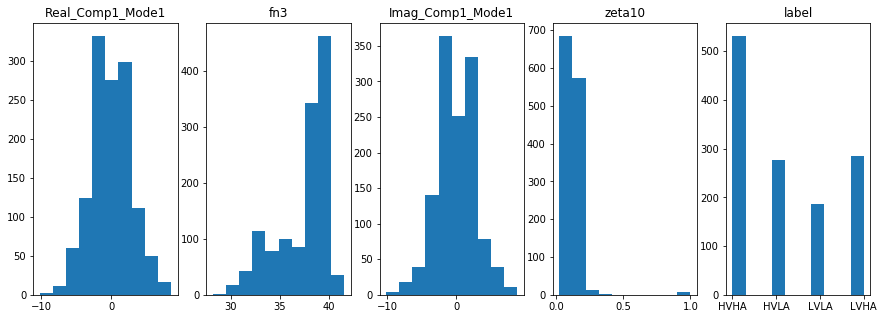

In [18]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs[0].hist(df_learn.Real_Comp1_Mode1)
axs[0].set_title('Real_Comp1_Mode1')
axs[1].hist(df_learn.fn3)
axs[1].set_title('fn3')
axs[2].hist(df_learn.Imag_Comp1_Mode1)
axs[2].set_title('Imag_Comp1_Mode1')
axs[3].hist(df_learn.zeta10)
axs[3].set_title('zeta10')
axs[4].hist(df_learn.emotion_quad)
axs[4].set_title('label')

In [19]:
valid_idx=np.random.randint(low=0, high=len(df_learn), size=256)

In [20]:
dep_var= 'emotion_quad'

In [21]:
path = "/media/tris/tris_files/EEG_datasets/DMD/tabular"

In [22]:
data = TabularDataBunch.from_df(path, df_learn, dep_var, valid_idx=valid_idx)

In [23]:
data.show_batch()

Real_Comp2_Mode15,Real_Comp9_Mode3,Real_Comp6_Mode19,Real_Comp8_Mode5,Real_Comp10_Mode22,Imag_Comp4_Mode23,Real_Comp5_Mode6,fn18,Real_Comp9_Mode23,Real_Comp10_Mode19,Imag_Comp8_Mode16,Real_Comp2_Mode1,Real_Comp6_Mode25,Imag_Comp8_Mode8,Imag_Comp5_Mode11,Imag_Comp4_Mode14,Real_Comp9_Mode25,Imag_Comp11_Mode17,Real_Comp4_Mode11,Real_Comp2_Mode5,Real_Comp6_Mode4,Real_Comp7_Mode7,Real_Comp6_Mode3,Real_Comp6_Mode14,Real_Comp4_Mode16,Real_Comp3_Mode19,Imag_Comp10_Mode6,Real_Comp4_Mode25,Imag_Comp6_Mode22,Real_Comp11_Mode6,Imag_Comp3_Mode2,Imag_Comp8_Mode12,Imag_Comp5_Mode9,Imag_Comp5_Mode1,Imag_Comp1_Mode21,Imag_Comp9_Mode21,zeta1,fn6,Imag_Comp6_Mode16,Imag_Comp11_Mode18,Real_Comp4_Mode1,Real_Comp5_Mode11,Imag_Comp1_Mode1,Imag_Comp2_Mode17,fn21,Imag_Comp8_Mode3,Real_Comp8_Mode17,fn7,Real_Comp5_Mode22,Imag_Comp4_Mode11,Real_Comp2_Mode10,Real_Comp11_Mode1,Imag_Comp7_Mode4,Real_Comp10_Mode1,zeta22,Imag_Comp2_Mode14,Real_Comp7_Mode22,Real_Comp6_Mode21,zeta14,Real_Comp11_Mode9,Real_Comp2_Mode17,Real_Comp10_Mode25,Real_Comp9_Mode1,Imag_Comp3_Mode13,Real_Comp3_Mode13,Imag_Comp5_Mode15,Imag_Comp10_Mode4,fn8,Imag_Comp7_Mode16,Real_Comp2_Mode11,Real_Comp11_Mode7,Real_Comp3_Mode2,Real_Comp6_Mode7,Imag_Comp4_Mode7,Imag_Comp8_Mode17,Real_Comp9_Mode18,Imag_Comp11_Mode9,zeta23,Real_Comp2_Mode6,Real_Comp9_Mode19,Real_Comp1_Mode17,Imag_Comp8_Mode11,Imag_Comp9_Mode20,Imag_Comp8_Mode13,zeta20,Real_Comp6_Mode10,Real_Comp7_Mode20,zeta15,Imag_Comp1_Mode15,Imag_Comp2_Mode22,Imag_Comp2_Mode2,Real_Comp4_Mode8,Imag_Comp6_Mode1,Imag_Comp2_Mode3,Real_Comp4_Mode21,Imag_Comp4_Mode24,Real_Comp7_Mode25,Real_Comp1_Mode13,Imag_Comp6_Mode8,Imag_Comp6_Mode12,Imag_Comp11_Mode19,Real_Comp9_Mode12,Real_Comp3_Mode18,Real_Comp11_Mode15,Real_Comp11_Mode10,zeta19,Real_Comp10_Mode14,Real_Comp3_Mode17,Imag_Comp11_Mode7,Real_Comp1_Mode4,fn5,Real_Comp1_Mode7,Imag_Comp11_Mode14,Imag_Comp4_Mode6,Imag_Comp11_Mode24,Real_Comp4_Mode9,Real_Comp9_Mode14,zeta6,Real_Comp10_Mode8,Imag_Comp8_Mode4,Imag_Comp10_Mode19,Imag_Comp10_Mode17,Real_Comp3_Mode4,Imag_Comp1_Mode23,Imag_Comp9_Mode24,Real_Comp11_Mode22,Real_Comp10_Mode7,Real_Comp9_Mode9,Imag_Comp8_Mode1,Real_Comp9_Mode16,Imag_Comp8_Mode10,Real_Comp8_Mode13,Real_Comp11_Mode18,Real_Comp10_Mode3,Real_Comp7_Mode8,Imag_Comp5_Mode2,Imag_Comp8_Mode5,zeta4,Real_Comp11_Mode11,Imag_Comp11_Mode22,Real_Comp7_Mode14,Imag_Comp8_Mode7,Real_Comp5_Mode4,Imag_Comp8_Mode6,Imag_Comp9_Mode14,Imag_Comp3_Mode16,Imag_Comp8_Mode21,Real_Comp5_Mode15,fn16,Imag_Comp8_Mode18,Real_Comp7_Mode18,Real_Comp7_Mode1,Imag_Comp4_Mode17,Real_Comp11_Mode8,Real_Comp2_Mode8,Real_Comp11_Mode25,Real_Comp3_Mode16,Real_Comp10_Mode16,fn15,Imag_Comp5_Mode22,Imag_Comp10_Mode15,Real_Comp10_Mode11,Real_Comp7_Mode3,Real_Comp8_Mode9,Real_Comp2_Mode12,Imag_Comp9_Mode6,Real_Comp6_Mode6,Imag_Comp6_Mode13,Real_Comp7_Mode4,Real_Comp2_Mode21,Imag_Comp2_Mode24,Real_Comp4_Mode6,Imag_Comp4_Mode3,Imag_Comp7_Mode21,Imag_Comp4_Mode1,Real_Comp8_Mode8,Real_Comp10_Mode12,Real_Comp5_Mode13,Imag_Comp9_Mode9,Imag_Comp9_Mode16,Imag_Comp10_Mode11,Real_Comp3_Mode21,Real_Comp5_Mode16,Real_Comp3_Mode23,Real_Comp4_Mode3,Real_Comp6_Mode11,Real_Comp6_Mode16,Imag_Comp8_Mode9,Imag_Comp11_Mode8,Real_Comp7_Mode23,Real_Comp4_Mode18,Real_Comp3_Mode20,Imag_Comp11_Mode21,Real_Comp9_Mode6,fn9,Real_Comp9_Mode8,Real_Comp8_Mode19,Imag_Comp7_Mode22,Real_Comp1_Mode23,Imag_Comp6_Mode15,Real_Comp4_Mode2,Real_Comp3_Mode14,Real_Comp8_Mode18,Imag_Comp4_Mode18,Real_Comp11_Mode20,Imag_Comp10_Mode20,Real_Comp11_Mode2,Real_Comp5_Mode5,Imag_Comp9_Mode5,Imag_Comp1_Mode17,Real_Comp3_Mode24,Real_Comp1_Mode12,zeta3,Imag_Comp5_Mode12,Imag_Comp4_Mode9,Real_Comp4_Mode24,Imag_Comp7_Mode24,fn20,Real_Comp1_Mode18,Real_Comp8_Mode14,Real_Comp11_Mode16,Real_Comp8_Mode20,Imag_Comp3_Mode20,Imag_Comp7_Mode17,Real_Comp4_Mode10,Imag_Comp2_Mode10,Real_Comp7_Mode24,Imag_Comp9_Mode18,Imag_Comp4_Mode25,Imag_Comp4_Mode12,Real_Comp1_Mode5,zeta8,Imag_Comp6_Mode6,Imag_Comp6_Mode23,zeta16,Real_Comp3_Mode25,Imag_Comp1_Mode7,zeta11,Real_Comp5_Mode8,Real_Comp1_Mode20,

In [24]:
# max_log_y = np.log(np.max(df_raw['subject'])*1.2)
# y_range = torch.tensor([0, max_log_y])

In [25]:
# learn = tabular_learner(data, layers=[2000,500], ps=[0.001,0.01], emb_drop=0.04, metrics=accuracy, emb_szs={'emotion_quad': 4})
learn = tabular_learner(data, layers=[100,10], ps=[0.001,0.01], emb_drop=0.04, metrics=accuracy)

In [26]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(602, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=602, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001, inplace=False)
    (4): Linear(in_features=100, out_features=10, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01, inplace=False)
    (8): Linear(in_features=10, out_features=4, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


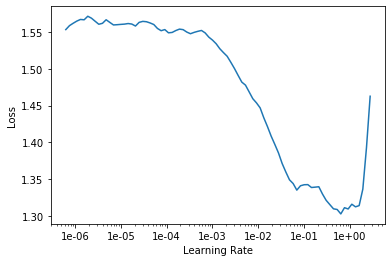

In [27]:
learn.lr_find()
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(5, 1e-2, wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,1.538635,1.426704,0.242188,00:00
1,1.273816,1.411409,0.402344,00:00
2,1.032540,1.597296,0.355469,00:00
3,0.810758,1.675124,0.371094,00:00
4,0.644728,1.690867,0.375000,00:00


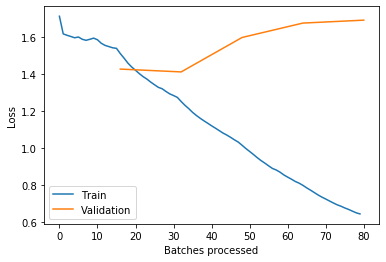

In [29]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


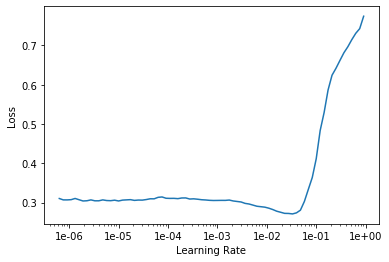

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(15, 1e-2, wd=0.5)

epoch,train_loss,valid_loss,accuracy,time
0,0.302401,1.704061,0.378906,00:00
1,0.269957,1.773092,0.347656,00:00
2,0.229827,1.976941,0.328125,00:00
3,0.300977,2.473239,0.289062,00:00
4,0.479911,1.755119,0.328125,00:00
5,0.476314,1.759435,0.382812,00:00
6,0.400955,1.753486,0.347656,00:00
7,0.313862,1.856944,0.402344,00:00
8,0.242493,1.920676,0.320312,00:00
9,0.187422,1.976906,0.371094,00:00


In [32]:
learn.show_results()

Real_Comp2_Mode15,Real_Comp9_Mode3,Real_Comp6_Mode19,Real_Comp8_Mode5,Real_Comp10_Mode22,Imag_Comp4_Mode23,Real_Comp5_Mode6,fn18,Real_Comp9_Mode23,Real_Comp10_Mode19,Imag_Comp8_Mode16,Real_Comp2_Mode1,Real_Comp6_Mode25,Imag_Comp8_Mode8,Imag_Comp5_Mode11,Imag_Comp4_Mode14,Real_Comp9_Mode25,Imag_Comp11_Mode17,Real_Comp4_Mode11,Real_Comp2_Mode5,Real_Comp6_Mode4,Real_Comp7_Mode7,Real_Comp6_Mode3,Real_Comp6_Mode14,Real_Comp4_Mode16,Real_Comp3_Mode19,Imag_Comp10_Mode6,Real_Comp4_Mode25,Imag_Comp6_Mode22,Real_Comp11_Mode6,Imag_Comp3_Mode2,Imag_Comp8_Mode12,Imag_Comp5_Mode9,Imag_Comp5_Mode1,Imag_Comp1_Mode21,Imag_Comp9_Mode21,zeta1,fn6,Imag_Comp6_Mode16,Imag_Comp11_Mode18,Real_Comp4_Mode1,Real_Comp5_Mode11,Imag_Comp1_Mode1,Imag_Comp2_Mode17,fn21,Imag_Comp8_Mode3,Real_Comp8_Mode17,fn7,Real_Comp5_Mode22,Imag_Comp4_Mode11,Real_Comp2_Mode10,Real_Comp11_Mode1,Imag_Comp7_Mode4,Real_Comp10_Mode1,zeta22,Imag_Comp2_Mode14,Real_Comp7_Mode22,Real_Comp6_Mode21,zeta14,Real_Comp11_Mode9,Real_Comp2_Mode17,Real_Comp10_Mode25,Real_Comp9_Mode1,Imag_Comp3_Mode13,Real_Comp3_Mode13,Imag_Comp5_Mode15,Imag_Comp10_Mode4,fn8,Imag_Comp7_Mode16,Real_Comp2_Mode11,Real_Comp11_Mode7,Real_Comp3_Mode2,Real_Comp6_Mode7,Imag_Comp4_Mode7,Imag_Comp8_Mode17,Real_Comp9_Mode18,Imag_Comp11_Mode9,zeta23,Real_Comp2_Mode6,Real_Comp9_Mode19,Real_Comp1_Mode17,Imag_Comp8_Mode11,Imag_Comp9_Mode20,Imag_Comp8_Mode13,zeta20,Real_Comp6_Mode10,Real_Comp7_Mode20,zeta15,Imag_Comp1_Mode15,Imag_Comp2_Mode22,Imag_Comp2_Mode2,Real_Comp4_Mode8,Imag_Comp6_Mode1,Imag_Comp2_Mode3,Real_Comp4_Mode21,Imag_Comp4_Mode24,Real_Comp7_Mode25,Real_Comp1_Mode13,Imag_Comp6_Mode8,Imag_Comp6_Mode12,Imag_Comp11_Mode19,Real_Comp9_Mode12,Real_Comp3_Mode18,Real_Comp11_Mode15,Real_Comp11_Mode10,zeta19,Real_Comp10_Mode14,Real_Comp3_Mode17,Imag_Comp11_Mode7,Real_Comp1_Mode4,fn5,Real_Comp1_Mode7,Imag_Comp11_Mode14,Imag_Comp4_Mode6,Imag_Comp11_Mode24,Real_Comp4_Mode9,Real_Comp9_Mode14,zeta6,Real_Comp10_Mode8,Imag_Comp8_Mode4,Imag_Comp10_Mode19,Imag_Comp10_Mode17,Real_Comp3_Mode4,Imag_Comp1_Mode23,Imag_Comp9_Mode24,Real_Comp11_Mode22,Real_Comp10_Mode7,Real_Comp9_Mode9,Imag_Comp8_Mode1,Real_Comp9_Mode16,Imag_Comp8_Mode10,Real_Comp8_Mode13,Real_Comp11_Mode18,Real_Comp10_Mode3,Real_Comp7_Mode8,Imag_Comp5_Mode2,Imag_Comp8_Mode5,zeta4,Real_Comp11_Mode11,Imag_Comp11_Mode22,Real_Comp7_Mode14,Imag_Comp8_Mode7,Real_Comp5_Mode4,Imag_Comp8_Mode6,Imag_Comp9_Mode14,Imag_Comp3_Mode16,Imag_Comp8_Mode21,Real_Comp5_Mode15,fn16,Imag_Comp8_Mode18,Real_Comp7_Mode18,Real_Comp7_Mode1,Imag_Comp4_Mode17,Real_Comp11_Mode8,Real_Comp2_Mode8,Real_Comp11_Mode25,Real_Comp3_Mode16,Real_Comp10_Mode16,fn15,Imag_Comp5_Mode22,Imag_Comp10_Mode15,Real_Comp10_Mode11,Real_Comp7_Mode3,Real_Comp8_Mode9,Real_Comp2_Mode12,Imag_Comp9_Mode6,Real_Comp6_Mode6,Imag_Comp6_Mode13,Real_Comp7_Mode4,Real_Comp2_Mode21,Imag_Comp2_Mode24,Real_Comp4_Mode6,Imag_Comp4_Mode3,Imag_Comp7_Mode21,Imag_Comp4_Mode1,Real_Comp8_Mode8,Real_Comp10_Mode12,Real_Comp5_Mode13,Imag_Comp9_Mode9,Imag_Comp9_Mode16,Imag_Comp10_Mode11,Real_Comp3_Mode21,Real_Comp5_Mode16,Real_Comp3_Mode23,Real_Comp4_Mode3,Real_Comp6_Mode11,Real_Comp6_Mode16,Imag_Comp8_Mode9,Imag_Comp11_Mode8,Real_Comp7_Mode23,Real_Comp4_Mode18,Real_Comp3_Mode20,Imag_Comp11_Mode21,Real_Comp9_Mode6,fn9,Real_Comp9_Mode8,Real_Comp8_Mode19,Imag_Comp7_Mode22,Real_Comp1_Mode23,Imag_Comp6_Mode15,Real_Comp4_Mode2,Real_Comp3_Mode14,Real_Comp8_Mode18,Imag_Comp4_Mode18,Real_Comp11_Mode20,Imag_Comp10_Mode20,Real_Comp11_Mode2,Real_Comp5_Mode5,Imag_Comp9_Mode5,Imag_Comp1_Mode17,Real_Comp3_Mode24,Real_Comp1_Mode12,zeta3,Imag_Comp5_Mode12,Imag_Comp4_Mode9,Real_Comp4_Mode24,Imag_Comp7_Mode24,fn20,Real_Comp1_Mode18,Real_Comp8_Mode14,Real_Comp11_Mode16,Real_Comp8_Mode20,Imag_Comp3_Mode20,Imag_Comp7_Mode17,Real_Comp4_Mode10,Imag_Comp2_Mode10,Real_Comp7_Mode24,Imag_Comp9_Mode18,Imag_Comp4_Mode25,Imag_Comp4_Mode12,Real_Comp1_Mode5,zeta8,Imag_Comp6_Mode6,Imag_Comp6_Mode23,zeta16,Real_Comp3_Mode25,Imag_Comp1_Mode7,zeta11,Real_Comp5_Mode8,Real_Comp1_Mode20,

In [33]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

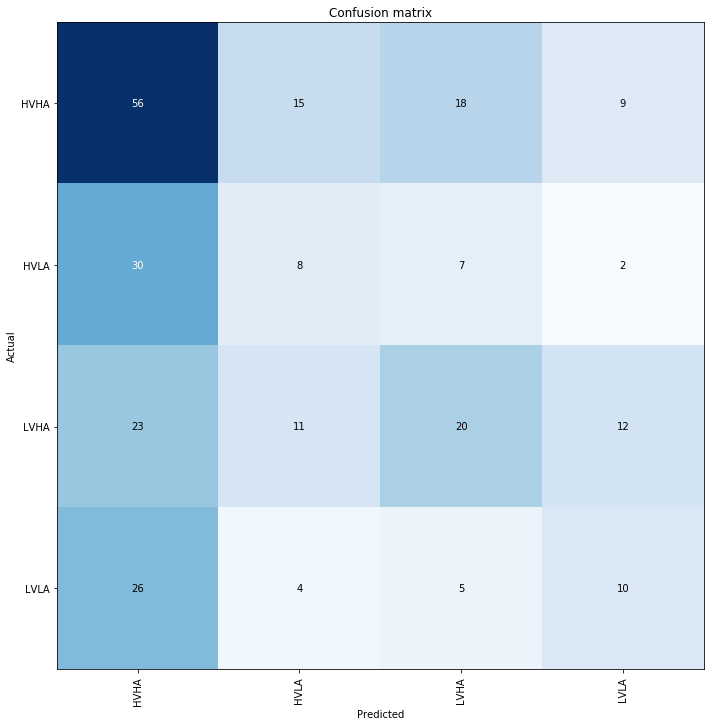

In [34]:
interp.plot_confusion_matrix(figsize=(10,10))